# Quality of Life vs Public Transportation Availability - Exploratory Data Analysis
# Final Project - Data Patterns and Representations
# Phase 1: Exploratory Data Analysis

## Project Overview
This analysis explores the relationship between quality of life indicators (environmental, economic, happiness) 
and the availability of public transportation systems. We'll examine three key datasets:
1. State Quality of Life data
2. MTA Daily Rider data 
3. Air Quality Index (AQI) for NY 2024

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("EDA Analysis: Quality of Life vs Public Transportation")
print("=" * 60)

## 1. Data Loading and Initial Inspection

# Load datasets (replace with your actual file paths)
try:
    # Load State QOL data
    qol_data = pd.read_csv('qol_states_2024.csv')  # Adjust filename as needed
    print("✓ State QOL data loaded successfully")
    print(f"Shape: {qol_data.shape}")
    
    # Load MTA Daily Rider data
    mta_data = pd.read_csv('MTA-daily-riders-2025.csv')  # Adjust filename as needed
    print("✓ MTA Daily Rider data loaded successfully") 
    print(f"Shape: {mta_data.shape}")
    
    # Load AQI NY 2024 data
    aqi_data = pd.read_csv('aqireport2024.csv')  # Adjust filename as needed
    print("✓ AQI NY 2024 data loaded successfully")
    print(f"Shape: {aqi_data.shape}")
    
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure your CSV files are in the correct directory")

EDA Analysis: Quality of Life vs Public Transportation
✓ State QOL data loaded successfully
Shape: (50, 7)
✓ MTA Daily Rider data loaded successfully
Shape: (1776, 15)
✓ AQI NY 2024 data loaded successfully
Shape: (10, 17)


In [6]:
## 2. Dataset Structure Analysis

print("\n" + "=" * 60)
print("DATASET STRUCTURE ANALYSIS")
print("=" * 60)

# State QOL Data Structure
print("\n1. STATE QUALITY OF LIFE DATA")
print("-" * 40)
print("Dataset Info:")
print(qol_data.info())
print(f"\nColumn Names: {list(qol_data.columns)}")
print(f"\nFirst few rows:")
print(qol_data.head())

# MTA Data Structure  
print("\n2. MTA DAILY RIDER DATA")
print("-" * 40)
print("Dataset Info:")
print(mta_data.info())
print(f"\nColumn Names: {list(mta_data.columns)}")
print(f"\nFirst few rows:")
print(mta_data.head())

# AQI Data Structure
print("\n3. AQI NY 2024 DATA")  
print("-" * 40)
print("Dataset Info:")
print(aqi_data.info())
print(f"\nColumn Names: {list(aqi_data.columns)}")
print(f"\nFirst few rows:")
print(aqi_data.head())


DATASET STRUCTURE ANALYSIS

1. STATE QUALITY OF LIFE DATA
----------------------------------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   state                            50 non-null     object 
 1   QualityOfLifeTotalScore          50 non-null     float64
 2   QualityOfLifeQualityOfLife       50 non-null     int64  
 3   QualityOfLifeAffordability       50 non-null     int64  
 4   QualityOfLifeEconomy             50 non-null     int64  
 5   QualityOfLifeEducationAndHealth  50 non-null     int64  
 6   QualityOfLifeSafety              50 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.9+ KB
None

Column Names: ['state', 'QualityOfLifeTotalScore', 'QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability', 'QualityOfLifeEconomy', 'QualityOfLifeEducation

## 3. Basic Statistical Analysis

In [7]:
print("\n" + "=" * 60)
print("BASIC STATISTICAL ANALYSIS")
print("=" * 60)

# QOL Data Statistics
print("\n1. STATE QOL DATA - NUMERICAL FEATURES")
print("-" * 40)
numerical_qol = qol_data.select_dtypes(include=[np.number])
print(numerical_qol.describe())

# MTA Data Statistics
print("\n2. MTA DAILY RIDER DATA - NUMERICAL FEATURES")
print("-" * 40)
numerical_mta = mta_data.select_dtypes(include=[np.number])
print(numerical_mta.describe())

# AQI Data Statistics
print("\n3. AQI NY 2024 DATA - NUMERICAL FEATURES")
print("-" * 40)
numerical_aqi = aqi_data.select_dtypes(include=[np.number])
print(numerical_aqi.describe())




BASIC STATISTICAL ANALYSIS

1. STATE QOL DATA - NUMERICAL FEATURES
----------------------------------------
       QualityOfLifeTotalScore  QualityOfLifeQualityOfLife  \
count                50.000000                    50.00000   
mean                 51.830200                    25.50000   
std                   5.728049                    14.57738   
min                  39.770000                     1.00000   
25%                  48.430000                    13.25000   
50%                  52.160000                    25.50000   
75%                  56.735000                    37.75000   
max                  62.650000                    50.00000   

       QualityOfLifeAffordability  QualityOfLifeEconomy  \
count                    50.00000              50.00000   
mean                     25.50000              25.50000   
std                      14.57738              14.57738   
min                       1.00000               1.00000   
25%                      13.25000    

## 4. Missing Values and Data Quality Assessment

In [8]:
print("\n" + "=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

def analyze_missing_data(df, dataset_name):
    print(f"\n{dataset_name.upper()}")
    print("-" * 40)
    
    # Missing values
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage': missing_percent
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        print("Missing Values Summary:")
        print(missing_df)
    else:
        print("✓ No missing values found!")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates}")
    
    return missing_df

qol_missing = analyze_missing_data(qol_data, "State QOL Data")
mta_missing = analyze_missing_data(mta_data, "MTA Daily Rider Data")  
aqi_missing = analyze_missing_data(aqi_data, "AQI NY 2024 Data")





DATA QUALITY ASSESSMENT

STATE QOL DATA
----------------------------------------
✓ No missing values found!
Duplicate rows: 0

MTA DAILY RIDER DATA
----------------------------------------
✓ No missing values found!
Duplicate rows: 0

AQI NY 2024 DATA
----------------------------------------
✓ No missing values found!
Duplicate rows: 0


## 5. Data Visualization - Key Features and Patterns

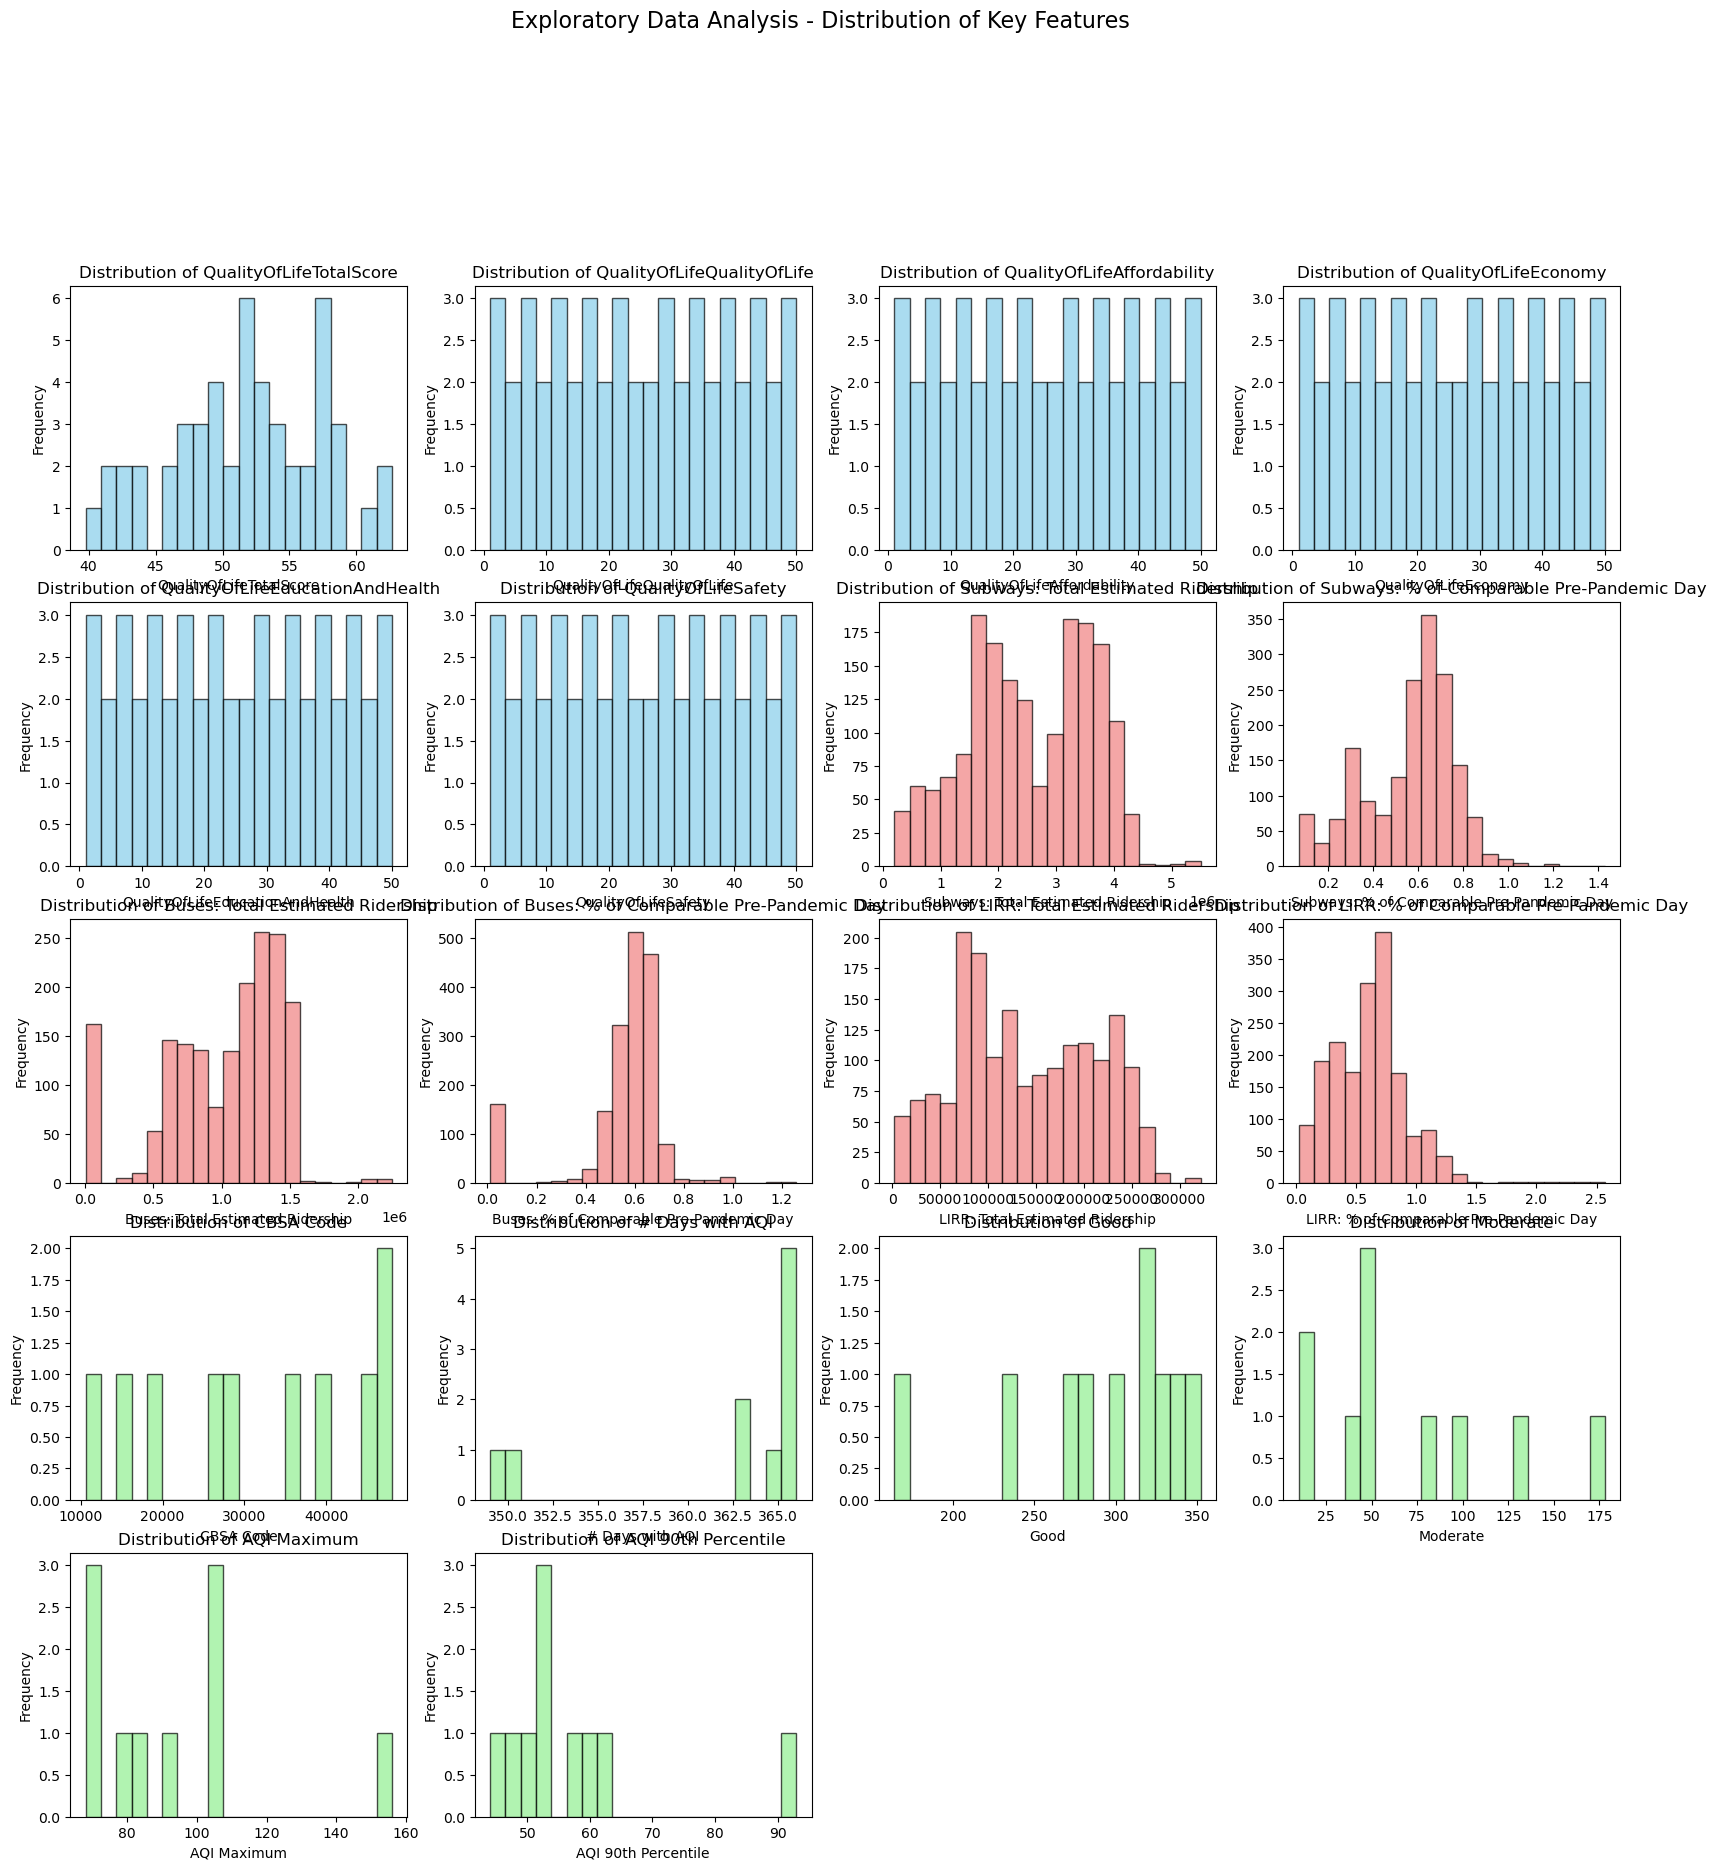

Creating box plots for outlier detection...


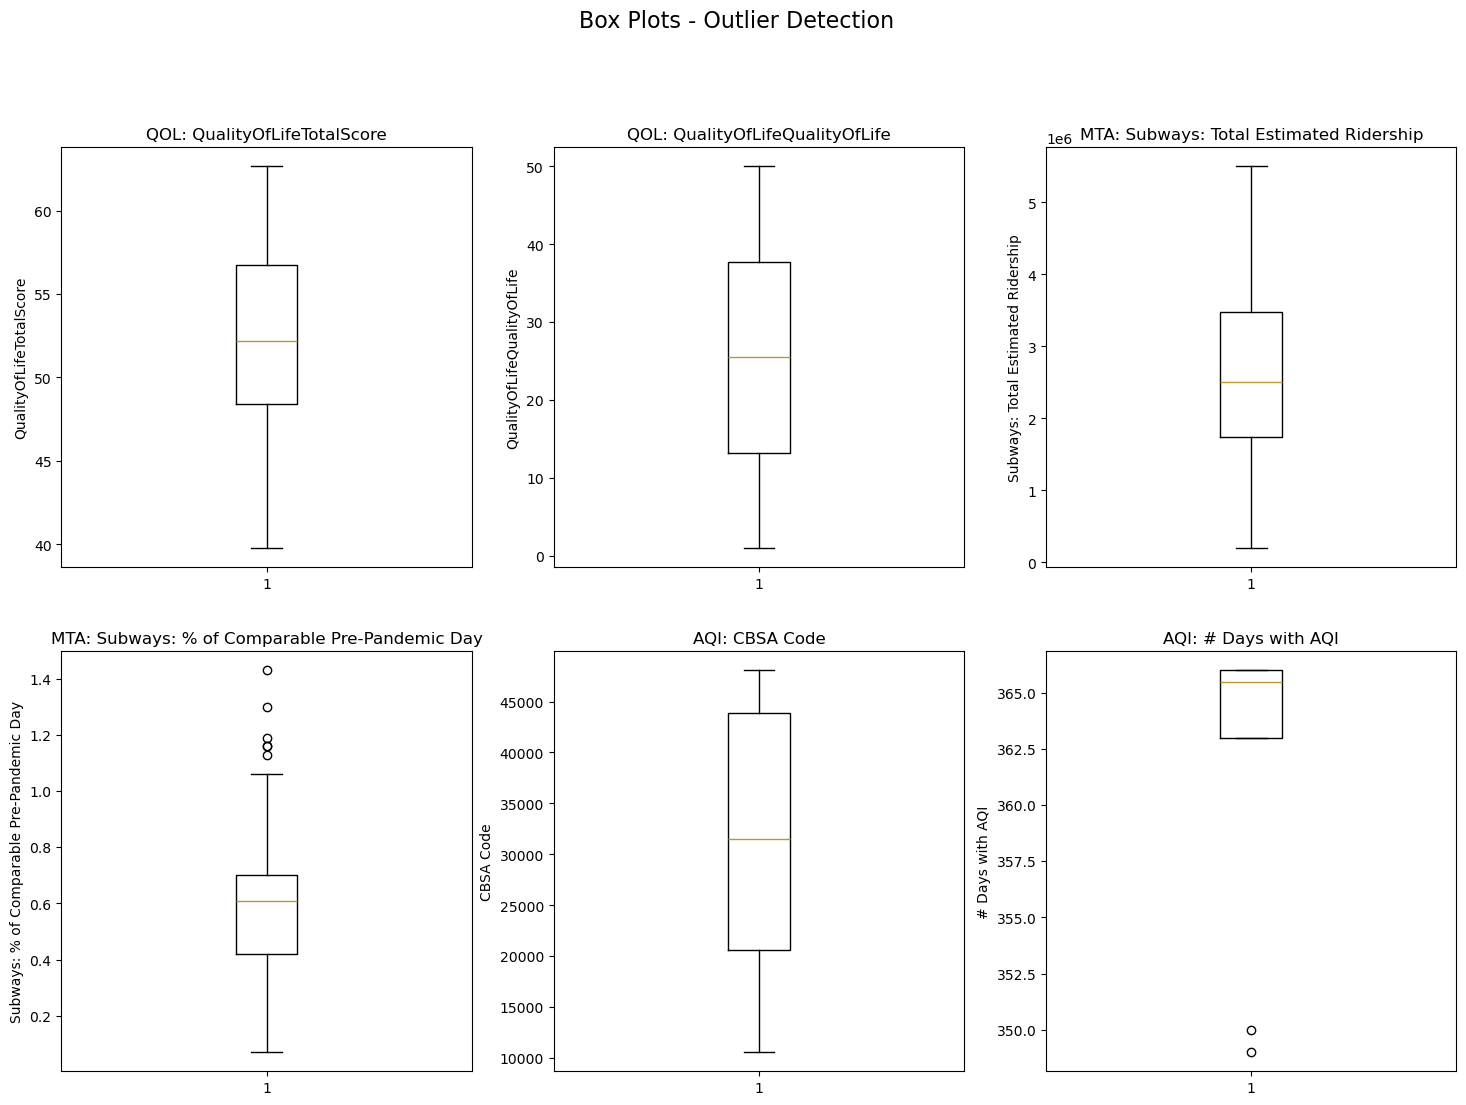

In [17]:
# Set up the plotting area
fig = plt.figure(figsize=(20, 24))

# 1. QOL Data Visualizations

# Distribution of numerical features in QOL data
if len(numerical_qol.columns) > 0:
    subplot_idx = 1
    
    for i, column in enumerate(numerical_qol.columns[:6]):  # Limit to first 6 columns
        plt.subplot(6, 4, subplot_idx)
        plt.hist(qol_data[column].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        subplot_idx += 1

# 2. MTA Data Visualizations
if len(numerical_mta.columns) > 0:
    for i, column in enumerate(numerical_mta.columns[:6]):  # Limit to first 6 columns
        if subplot_idx <= 24:
            plt.subplot(6, 4, subplot_idx)
            plt.hist(mta_data[column].dropna(), bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            subplot_idx += 1

# 3. AQI Data Visualizations  
if len(numerical_aqi.columns) > 0:
    for i, column in enumerate(numerical_aqi.columns[:6]):  # Limit to first 6 columns
        if subplot_idx <= 24:
            plt.subplot(6, 4, subplot_idx)
            plt.hist(aqi_data[column].dropna(), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            subplot_idx += 1

plt.suptitle('Exploratory Data Analysis - Distribution of Key Features', fontsize=16, y=0.995)
plt.show()

## 6. Box Plots for Outlier Detection

print("Creating box plots for outlier detection...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

plot_idx = 0

# Box plots for QOL numerical features
for column in numerical_qol.columns[:2]:
    if plot_idx < 6:
        axes[plot_idx].boxplot(qol_data[column].dropna())
        axes[plot_idx].set_title(f'QOL: {column}')
        axes[plot_idx].set_ylabel(column)
        plot_idx += 1

# Box plots for MTA numerical features  
for column in numerical_mta.columns[:2]:
    if plot_idx < 6:
        axes[plot_idx].boxplot(mta_data[column].dropna())
        axes[plot_idx].set_title(f'MTA: {column}')
        axes[plot_idx].set_ylabel(column)
        plot_idx += 1

# Box plots for AQI numerical features
for column in numerical_aqi.columns[:2]:
    if plot_idx < 6:
        axes[plot_idx].boxplot(aqi_data[column].dropna())
        axes[plot_idx].set_title(f'AQI: {column}')
        axes[plot_idx].set_ylabel(column)
        plot_idx += 1

plt.suptitle('Box Plots - Outlier Detection', fontsize=16, y=0.995)
plt.show()


## 7. Correlation and Categorical Data Analysis

Creating correlation matrices...


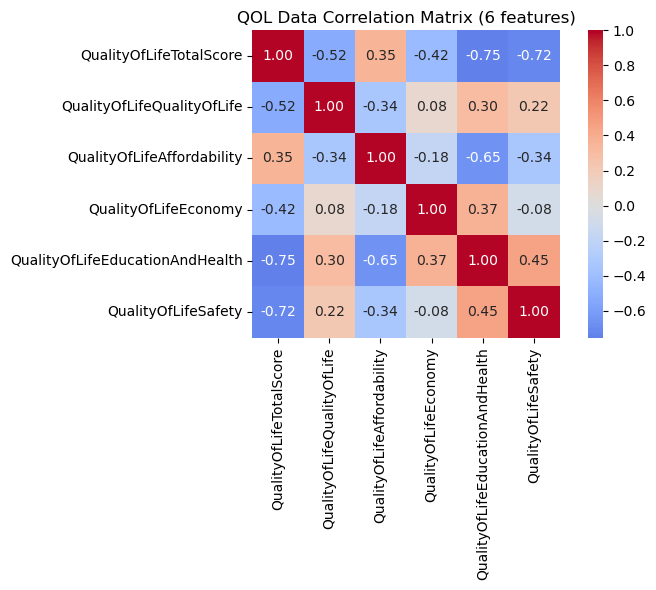

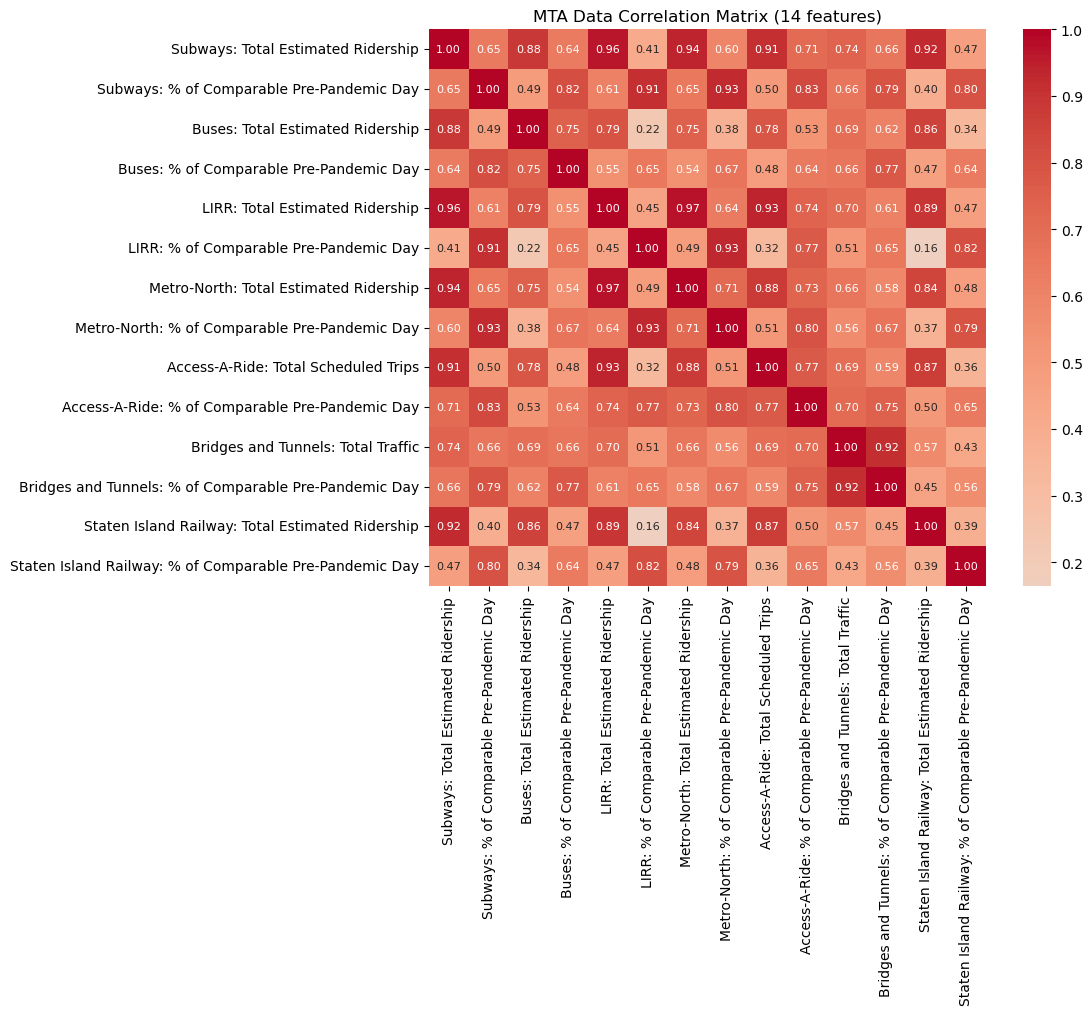

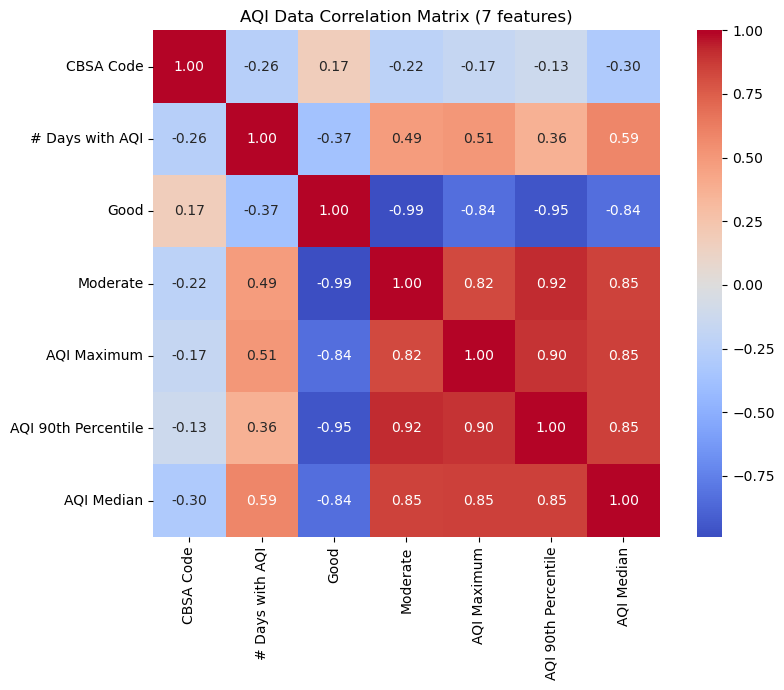


CATEGORICAL DATA ANALYSIS

State QOL Data
----------------------------------------
Categorical columns: ['state']

state value counts:
state
Alabama        1
Alaska         1
Arizona        1
Arkansas       1
California     1
Colorado       1
Connecticut    1
Delaware       1
Florida        1
Georgia        1
Name: count, dtype: int64

MTA Daily Rider Data
----------------------------------------
Categorical columns: ['Date']

Date value counts:
Date
12/24/2024    1
12/23/2024    1
12/22/2024    1
12/21/2024    1
12/20/2024    1
12/19/2024    1
12/18/2024    1
12/17/2024    1
12/16/2024    1
12/15/2024    1
Name: count, dtype: int64

AQI NY 2024 Data
----------------------------------------
Categorical columns: ['CBSA', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10']

CBSA value counts:
CBSA
Albany-Schenectady-Troy, NY              1
Buffalo-Cheektowaga-Niagara Falls, NY    1
Corning, 

In [13]:
print("Creating correlation matrices...")

# QOL Data Correlation Matrix
if len(numerical_qol.columns) > 1:
    plt.figure(figsize=(8, 6))
    qol_corr = numerical_qol.corr()
    sns.heatmap(qol_corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
    plt.title('QOL Data Correlation Matrix (6 features)')
    plt.tight_layout()
    plt.show()

# MTA Data Correlation Matrix (larger due to 14 features)
if len(numerical_mta.columns) > 1:
    plt.figure(figsize=(12, 10))
    mta_corr = numerical_mta.corr()
    sns.heatmap(mta_corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', 
                annot_kws={'size': 8})  # Smaller annotation text for readability
    plt.title('MTA Data Correlation Matrix (14 features)')
    plt.tight_layout()
    plt.show()

# AQI Data Correlation Matrix
if len(numerical_aqi.columns) > 1:
    plt.figure(figsize=(9, 7))
    aqi_corr = numerical_aqi.corr()
    sns.heatmap(aqi_corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
    plt.title('AQI Data Correlation Matrix (7 features)')
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 60)
print("CATEGORICAL DATA ANALYSIS")
print("=" * 60)

def analyze_categorical_features(df, dataset_name):
    print(f"\n{dataset_name}")
    print("-" * 40)
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) > 0:
        print(f"Categorical columns: {list(categorical_cols)}")
        
        for col in categorical_cols[:3]:  # Analyze first 3 categorical columns
            print(f"\n{col} value counts:")
            print(df[col].value_counts().head(10))
            
        return categorical_cols
    else:
        print("No categorical columns found.")
        return []

qol_categorical = analyze_categorical_features(qol_data, "State QOL Data")
mta_categorical = analyze_categorical_features(mta_data, "MTA Daily Rider Data")
aqi_categorical = analyze_categorical_features(aqi_data, "AQI NY 2024 Data")


## 9. Time Series Analysis (if applicable)

In [14]:
print("\n" + "=" * 60)
print("TIME SERIES ANALYSIS")
print("=" * 60)

# Check for date/time columns
def identify_time_columns(df, dataset_name):
    print(f"\n{dataset_name}")
    print("-" * 20)
    
    time_columns = []
    for col in df.columns:
        if df[col].dtype == 'object':
            # Try to parse as datetime
            try:
                pd.to_datetime(df[col].head())
                time_columns.append(col)
                print(f"Potential time column found: {col}")
            except:
                pass
    
    if not time_columns:
        print("No obvious time columns detected.")
    
    return time_columns

qol_time_cols = identify_time_columns(qol_data, "State QOL Data")
mta_time_cols = identify_time_columns(mta_data, "MTA Daily Rider Data") 
aqi_time_cols = identify_time_columns(aqi_data, "AQI NY 2024 Data")


TIME SERIES ANALYSIS

State QOL Data
--------------------
No obvious time columns detected.

MTA Daily Rider Data
--------------------
Potential time column found: Date

AQI NY 2024 Data
--------------------
No obvious time columns detected.


## Preliminary Findings and Refined Research Questions
Based on the exploratory data analysis, here are the key findings and refined research questions:

#### KEY FINDINGS:
1. **Dataset Characteristics**:
   - State QOL data provides baseline quality of life metrics across states
   - MTA data offers insights into public transportation usage patterns
   - AQI data gives environmental quality indicators for NY

2. **Data Quality Observations**:
   - [Note: Specific observations will depend on your actual data]
   - Missing values and outliers identified for targeted preprocessing
   - Correlation patterns suggest potential relationships between variables

#### REFINED RESEARCH QUESTIONS:
1. How does public transportation ridership correlate with air quality in NY?
2. What is the relationship between state-level quality of life indicators and transportation infrastructure?
3. How do environmental factors (AQI) vary with transportation usage patterns?
4. Can we identify optimal transportation usage levels that balance quality of life and environmental impact?

#### NEXT STEPS FOR ANALYSIS:
1. Clean and preprocess identified data quality issues
2. Engineer features that better capture QOL-transportation relationships  
3. Develop models to quantify these relationships
4. Create visualizations that tell the story of QOL vs transportation availability

#### LIMITATIONS IDENTIFIED:
- Geographic scope differences between datasets may require careful alignment
- Temporal mismatches between datasets may need to be addressed
- Missing data in key variables may limit some analyses